# Data Visualization 102: Creating Static Visualizations using Python
Vishal Bakshi  
PyDataPDX  
Follow us on Twitter: @pydatapdx

## Overview

- Summary of datasets
- Creating common visualizations using Python (temporal, spatial, categorical, statistical, continuous)
- Exploring datasets as a group

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import geopandas as gpd
import numpy as np

## Summary of Datasets
The following datasets were obtained from the ["Data is Plural - Structured Archive"](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0).

### COVID-19 Vaccinations in the United States
From: [COVID-19 Vaccinations in the United States, County](https://healthdata.gov/dataset/COVID-19-Vaccinations-in-the-United-States-County/ipdn-uaih)

>Overall US COVID-19 Vaccine administration data at county level. Data represents all vaccine partners including jurisdictional partner clinics, retail pharmacies, long-term care facilities, dialysis centers, Federal Emergency Management Agency and Health Resources and Services Administration partner sites, and federal entity facilities. 

|Column Name|Description|Type|
|-|-|-|
|Date|Date data are reported on CDC COVID Data Tracker|Date & Time|
|FIPS|Federal Information Processing Standard State Code|Plan Text|
|MMWR_week|[MMWR Week](https://wwwn.cdc.gov/nndss/document/MMWR_week_overview.pdf) is the week of the epidemiologic year for which the disease report is assigned|Number|
|Recip_County|County of residence|Plain Text|
|Recip_State|Recipient State|Plain Text|
|Series_Complete_Pop_Pct|Percent of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives|Number|
|Series_Complete_Yes|Total number of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives|Number|
|Series_Complete_12Plus|Total number of people 12+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives|Number|
|Series_Complete_12PlusPop_Pct|Percent of people 12+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives|Number|
|Series_Complete_18Plus|Total number of people 18+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives|Number|
|Series_Complete_18PlusPop_Pct|Percent of people 18+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives|Number|
|Series_Complete_65Plus|Total number of people 65+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives|Number|
|Series_Complete_65PlusPop_Pct|Percent of people 65+ who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction where recipient lives|Number|
|Completeness_pct|Represents the proportion of fully vaccinated people whose Federal Information Processing Standards (FIPS) code is reported and matches a valid county FIPS code in the jurisdiction.|Number|


### Census Bureau County Population Totals: 2010-2019

From: [County Population Totals: 2010-2019](https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-total.html#par_textimage)

In [2]:
county_pop = pd.read_csv('co-est2019-alldata.csv')
county_pop.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [3]:
# add leading zeroes to STATE and COUNTY FIPS codes
county_pop['STATE_STR'] = county_pop['STATE'].apply(str).apply(lambda x: x.zfill(2))
county_pop['COUNTY_STR'] = county_pop['COUNTY'].apply(str).apply(lambda x: x.zfill(3))
county_pop['FIPS'] = county_pop['STATE_STR'] + county_pop['COUNTY_STR']
county_pop = county_pop.loc[:,['FIPS', 'POPESTIMATE2019']]
county_pop.head()

,FIPS,POPESTIMATE2019
0,01000,4903185
1,01001,55869
2,01003,223234
3,01005,24686
4,01007,22394


### United States COVID-19 Cases and Deaths by State over Time

From: [Google Coronavirus (COVID-19) statistics data](https://www.google.com/search?q=total+covid+cases+by+US+state&ei=XHjTYMv4FpHI-wSEpKGYBw&oq=total+covid+cases+by+US+state&gs_lcp=Cgdnd3Mtd2l6EAMyBggAEAgQHjIGCAAQCBAeMgUIABCGAzIFCAAQhgMyBQgAEIYDOgcIABBHELADOggIABAIEAcQHkoECEEYAFDzIViyJGCpJmgBcAJ4AIABygKIAdcGkgEHNS4xLjAuMZgBAKABAaoBB2d3cy13aXrIAQjAAQE&sclient=gws-wiz&ved=0ahUKEwjLlr66rK7xAhUR5J4KHQRSCHMQ4dUDCA4&uact=5)

In [4]:
cases_deaths_data = pd.read_csv('us_covid_cases.csv')
cases_deaths_data.head()

,state,cases,deaths,abbrev
0,California,3.81,63370,CA
1,Texas,2.98,52328,TX
2,Florida,2.32,37656,FL
3,New York,2.11,53048,NY
4,Illinois,1.39,25600,IL


## Visualizing Temporal Data

**Question:** 

- What percent of the population was fully vaccinated over time?

In [5]:
data = pd.read_csv("COVID-19_Vaccinations_in_the_United_States_County.csv")
data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct
0,06/20/2021,04003,25,Cochise County,AZ,39.4,49665,49664,45.9,48447,49.0,19266,66.2,97.4
1,06/20/2021,08105,25,Rio Grande County,CO,33.4,3764,3757,38.9,3619,41.4,1178,50.1,74.9
2,06/20/2021,48391,25,Refugio County,TX,0.0,0,0,0.0,0,0.0,0,0.0,0.0
3,06/20/2021,41033,25,Josephine County,OR,36.2,31643,31618,41.4,30765,43.7,15149,65.7,97.7
4,06/20/2021,53015,25,Cowlitz County,WA,43.6,48164,48164,51.2,46739,54.7,17614,82.4,96.1


### First attempt of a scatterplot visualization with `plt.scatter`

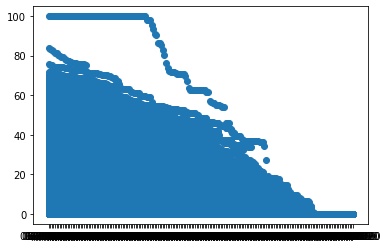

In [6]:
_ = plt.scatter(data["Date"], data["Series_Complete_Pop_Pct"])

### Using the object-oriented interface using `plt.subplots` 

From the tutorial ["The Lifecycle of a Plot"](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#saving-our-plot) in the matplotlib documentation:

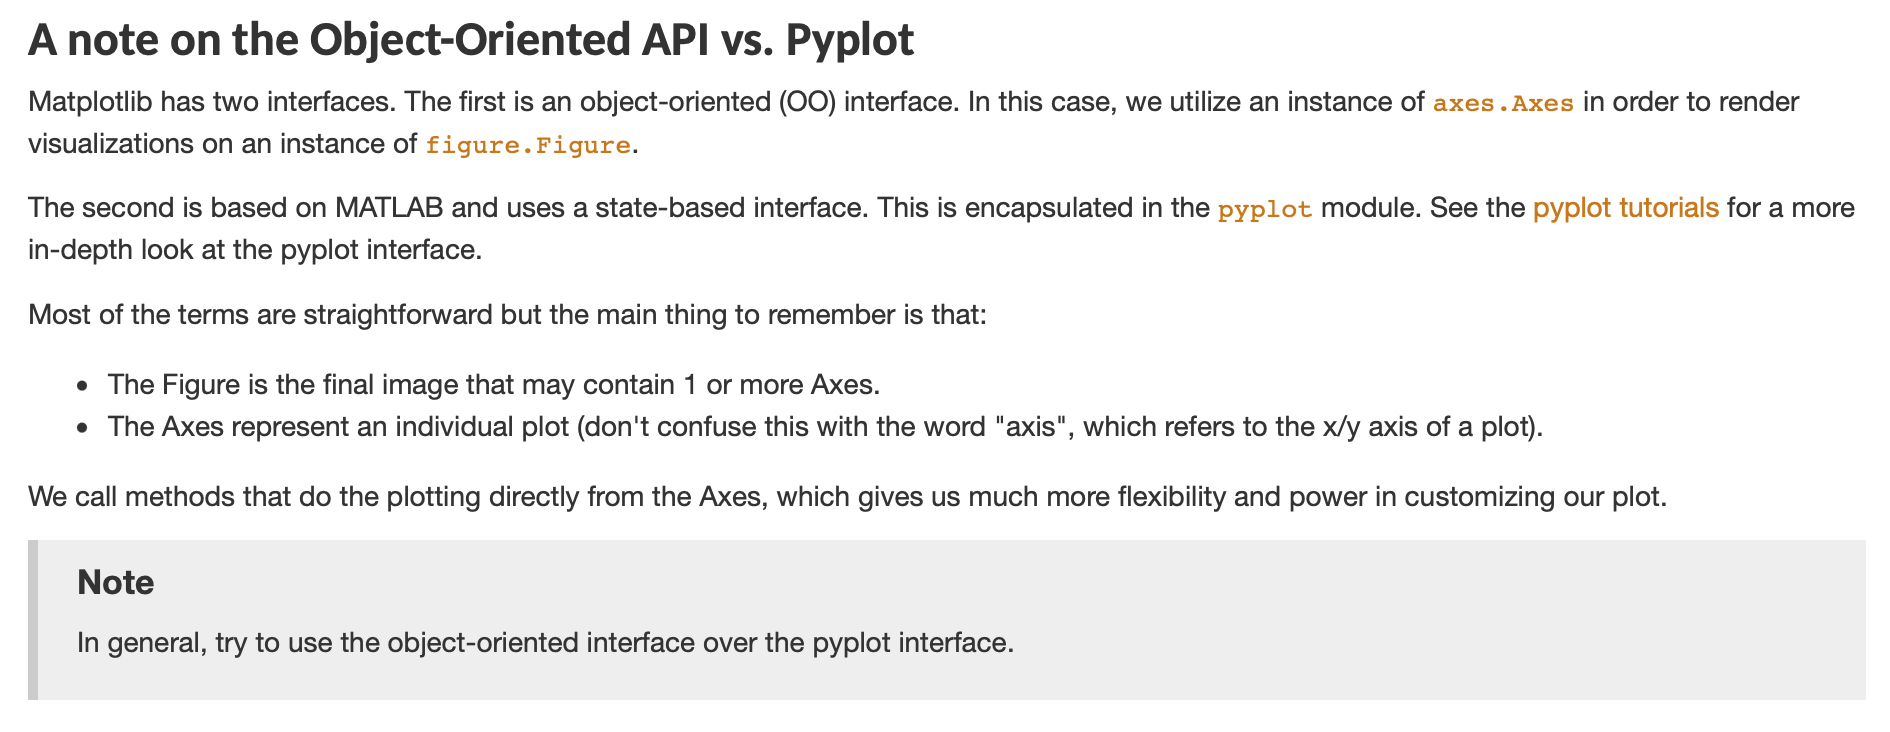

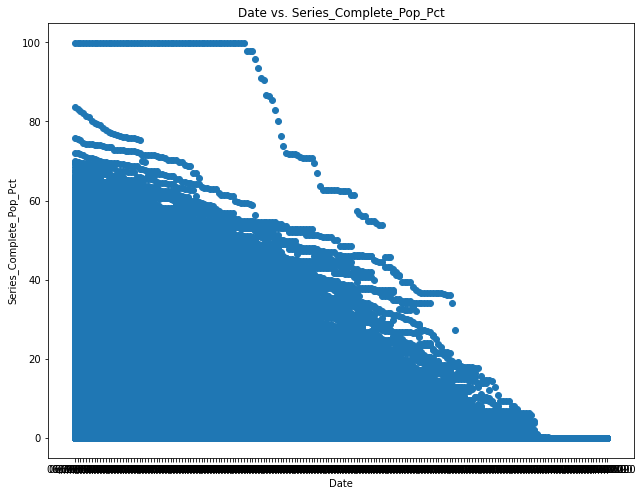

In [7]:
# create a Figure and Axes object
fig, ax = plt.subplots()
ax.set_xlabel("Date")
ax.set_ylabel("Series_Complete_Pop_Pct")
ax.set_title("Date vs. Series_Complete_Pop_Pct")

fig.set_size_inches(10.5, 8)
_ = ax.scatter(data["Date"], data["Series_Complete_Pop_Pct"])

In [8]:
# matplotlib default figure size
rcParams['figure.figsize']

[6.0, 4.0]

In [9]:
# matplotlib default file format
rcParams['savefig.format']

'png'

In [10]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [11]:
fig.savefig("Figure 1 - Date vs Series_Complete_Pop_Pct")

### Return to the data

In [12]:
# convert Date to a Timestamp
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct
0,2021-06-20,04003,25,Cochise County,AZ,39.4,49665,49664,45.9,48447,49.0,19266,66.2,97.4
1,2021-06-20,08105,25,Rio Grande County,CO,33.4,3764,3757,38.9,3619,41.4,1178,50.1,74.9
2,2021-06-20,48391,25,Refugio County,TX,0.0,0,0,0.0,0,0.0,0,0.0,0.0
3,2021-06-20,41033,25,Josephine County,OR,36.2,31643,31618,41.4,30765,43.7,15149,65.7,97.7
4,2021-06-20,53015,25,Cowlitz County,WA,43.6,48164,48164,51.2,46739,54.7,17614,82.4,96.1


### Plot the updated data

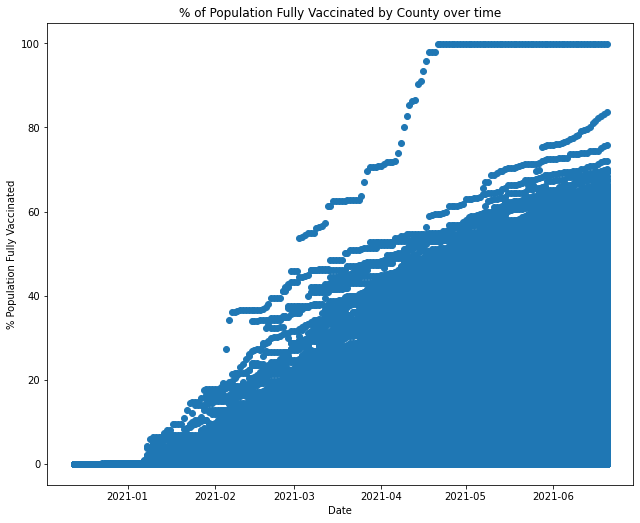

In [13]:
fig, ax = plt.subplots()
ax.set(
    xlabel="Date", 
    ylabel="% Population Fully Vaccinated",
    title="% of Population Fully Vaccinated by County over time")
fig.set_size_inches(10.5,8.5)
_ = ax.scatter(data["Date"], data["Series_Complete_Pop_Pct"])

### Aggregate the data

In [14]:
grouped = data.groupby(["Date", "Recip_State"])["Series_Complete_Pop_Pct"].mean()
grouped

Date        Recip_State
2020-12-13  AK              0.000000
            AL              0.000000
            AR              0.000000
            AZ              0.000000
            CA              0.000000
                             ...    
2021-06-20  VT             41.926667
            WA             42.015000
            WI             43.161644
            WV             17.719643
            WY             29.279167
Name: Series_Complete_Pop_Pct, Length: 11344, dtype: float64

In [15]:
# Alternate dataframe using DataFrame.pivot_table
data.pivot_table(index='Date', columns='Recip_State', values='Series_Complete_Pop_Pct',
                 aggfunc=np.mean, fill_value=0)

Recip_State,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TX,UNK,UT,VA,VI,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-13,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0,0,0.000000,0.000000,0,0.000000,0.0000,0.000000,0.000000,0.000000
2020-12-14,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0,0,0.000000,0.000000,0,0.000000,0.0000,0.000000,0.000000,0.000000
2020-12-15,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0,0,0.000000,0.000000,0,0.000000,0.0000,0.000000,0.000000,0.000000
2020-12-16,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0,0,0.000000,0.000000,0,0.000000,0.0000,0.000000,0.000000,0.000000
2020-12-17,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0,0,0.000000,0.000000,0,0.000000,0.0000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,45.866667,25.672059,26.721053,0,38.40000,35.771186,28.113846,50.211111,23.40,32.550,...,0,0,29.303333,15.948507,0,41.146667,40.9000,42.387671,17.498214,29.008333
2021-06-17,46.013333,26.188235,26.822368,0,38.71250,35.935593,28.304615,50.477778,23.60,32.850,...,0,0,29.586667,15.968657,0,41.346667,41.4300,42.643836,17.539286,29.025000
2021-06-18,46.220000,26.195588,26.909211,0,38.85625,36.096610,28.412308,50.655556,23.70,33.050,...,0,0,29.590000,16.113433,0,41.473333,41.6125,42.809589,17.605357,29.179167


In [16]:
grouped.unstack()

Recip_State,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TX,UNK,UT,VA,VI,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-13,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,NaN,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000
2020-12-14,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,NaN,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000
2020-12-15,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,NaN,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000
2020-12-16,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,NaN,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000
2020-12-17,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.00,0.000,...,0.0,NaN,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,45.866667,25.672059,26.721053,0.0,38.40000,35.771186,28.113846,50.211111,23.40,32.550,...,0.0,0.0,29.303333,15.948507,0.0,41.146667,40.9000,42.387671,17.498214,29.008333
2021-06-17,46.013333,26.188235,26.822368,0.0,38.71250,35.935593,28.304615,50.477778,23.60,32.850,...,0.0,0.0,29.586667,15.968657,0.0,41.346667,41.4300,42.643836,17.539286,29.025000
2021-06-18,46.220000,26.195588,26.909211,0.0,38.85625,36.096610,28.412308,50.655556,23.70,33.050,...,0.0,0.0,29.590000,16.113433,0.0,41.473333,41.6125,42.809589,17.605357,29.179167


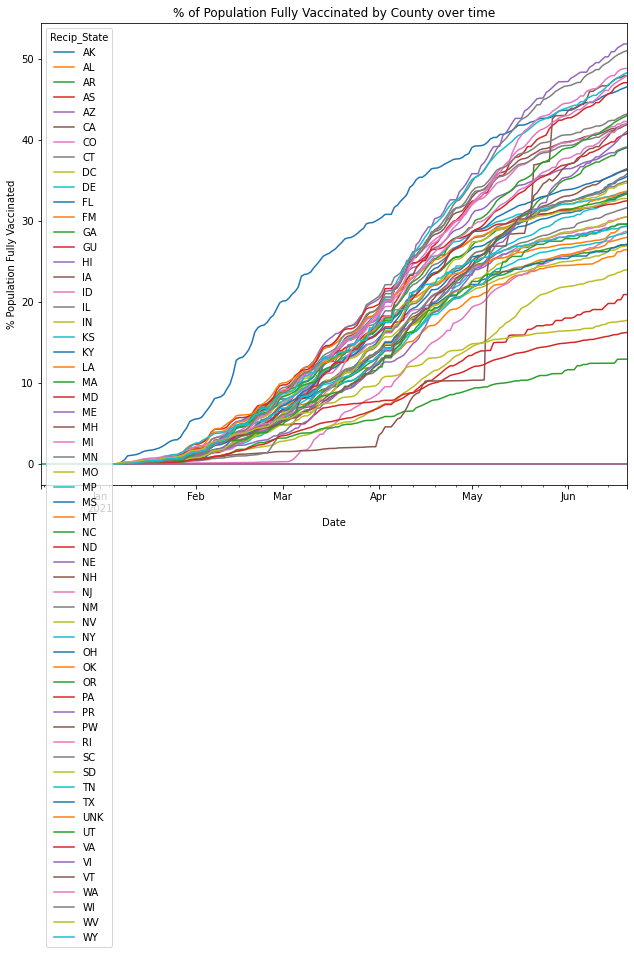

In [17]:
fig, ax = plt.subplots()
ax.set(
    xlabel="Date", 
    ylabel="% Population Fully Vaccinated", 
    title="% of Population Fully Vaccinated by County over time"
)
fig.set_size_inches(10.5,8.5)
_ = grouped.unstack().plot(ax=ax)

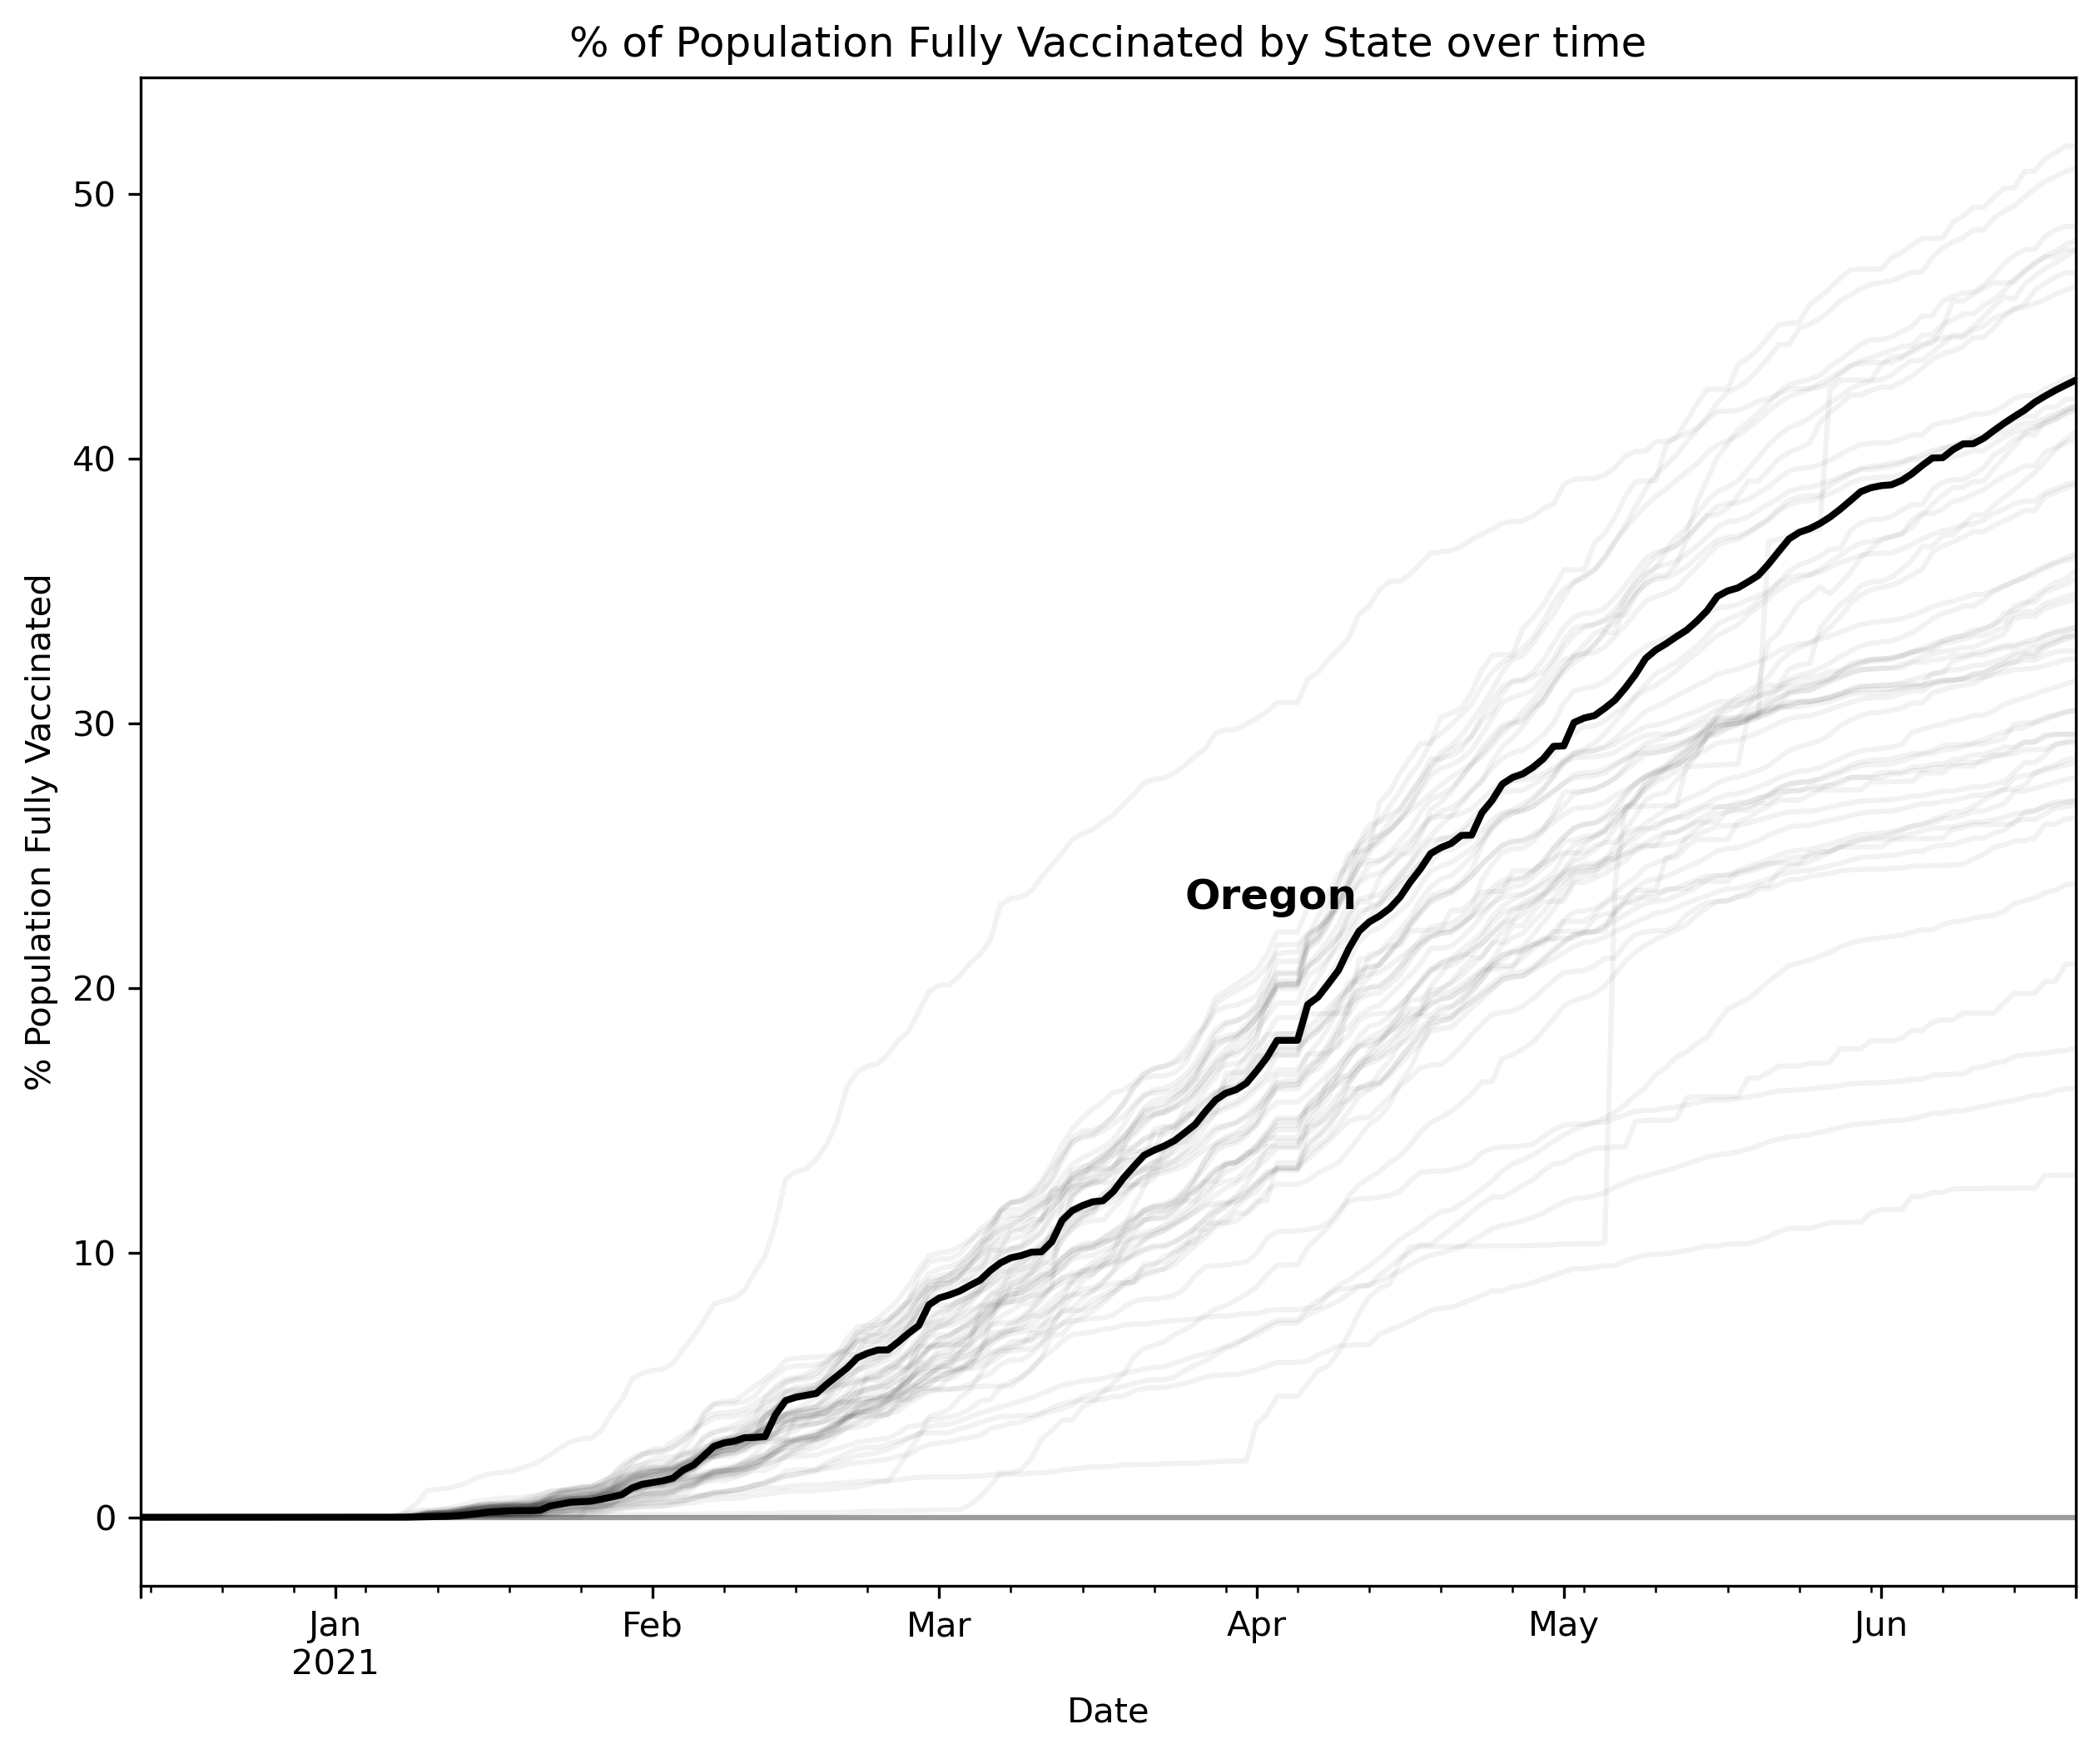

In [18]:
# create plot objects
fig, ax = plt.subplots()

# set labels, title, figure size and resolution
ax.set(
    xlabel="Date", 
    ylabel="% Population Fully Vaccinated", 
    title="% of Population Fully Vaccinated by State over time")
fig.set_size_inches(10, 8)
fig.set_dpi(300)

# plot the grouped data for all states on the axes created above
grouped_ax = grouped.unstack().plot(ax=ax, c='black', alpha=0.05)

# plot Oregon data on top of the previous plot
grouped.unstack()["OR"].plot(ax=ax, c='black', linewidth=2)

# add an annotation to identify Oregon's data
ax.annotate(
    text='Oregon', 
    xy=('2021-03-25', 23),
    fontsize='large',
    fontweight='bold'
)
grouped_ax.get_legend().remove()

findfont: Font family ['Iowan Old Style'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Iowan Old Style'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Futura'] not found. Falling back to DejaVu Sans.


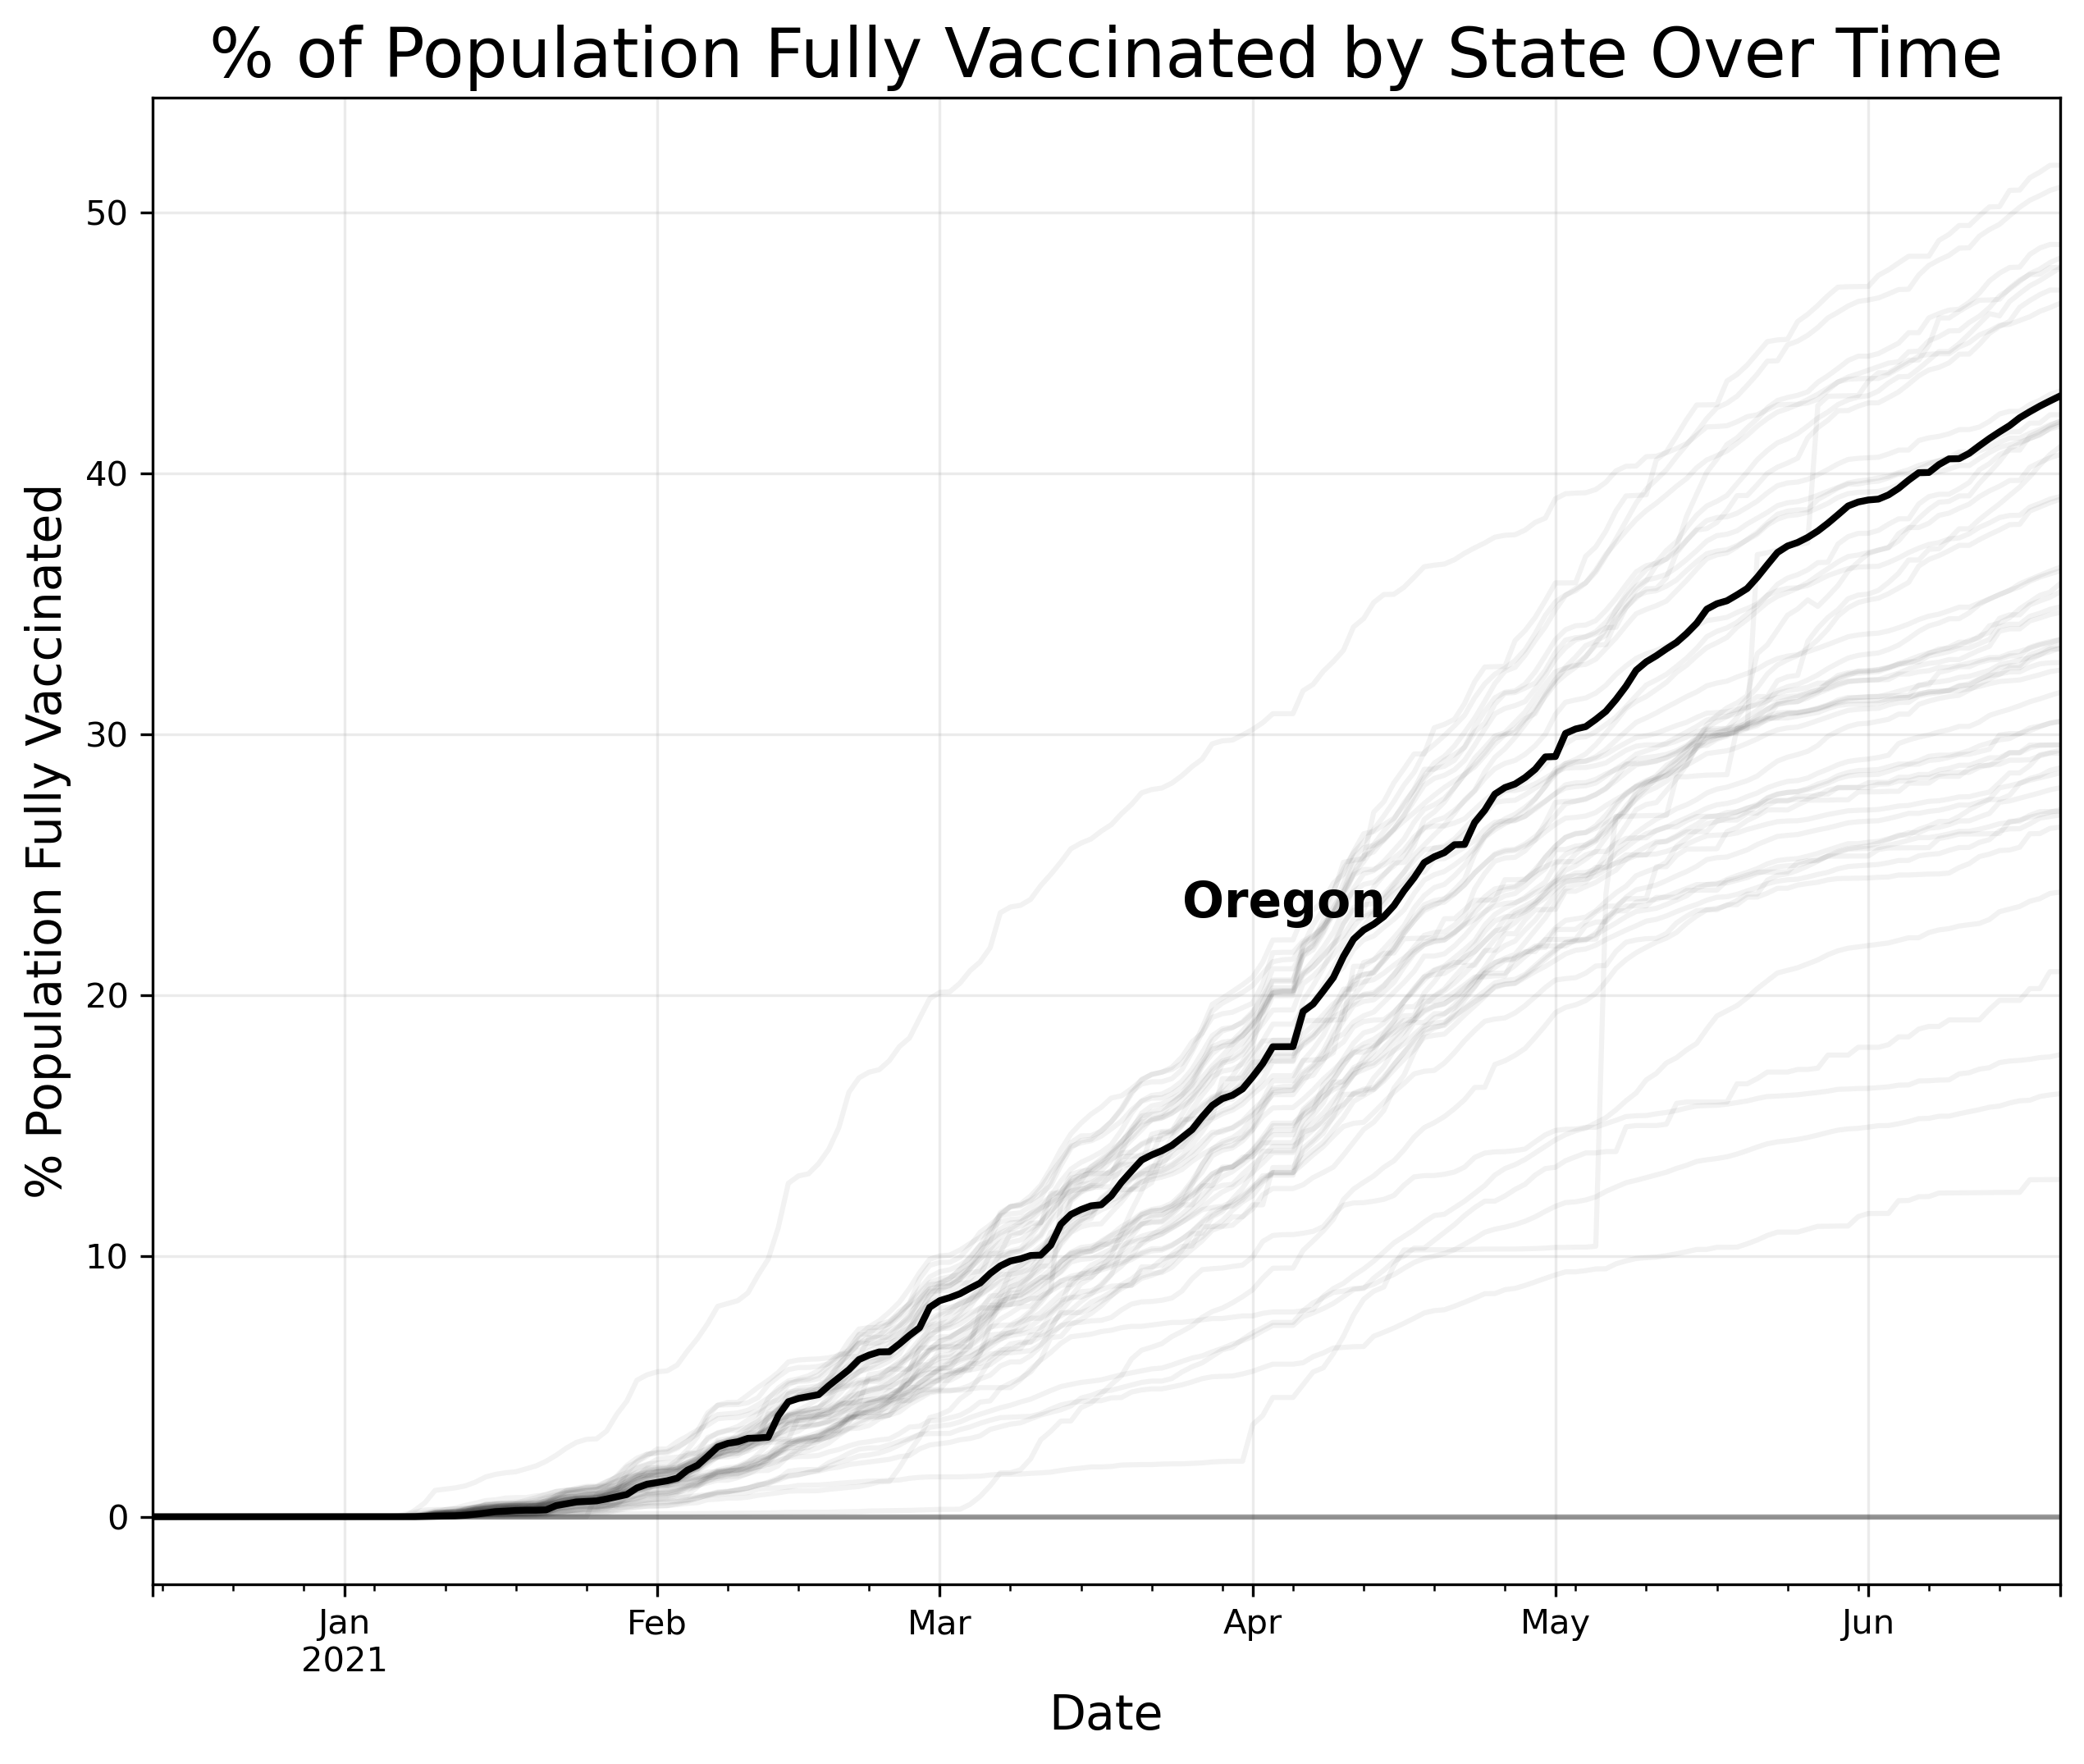

In [19]:
# create plot objects
fig, ax = plt.subplots()

# set labels, title and figure size
ax.set_xlabel("Date", fontsize=14, fontname='Iowan Old Style')
ax.set_ylabel("% Population Fully Vaccinated", fontsize=14, fontname='Iowan Old Style')
ax.set_title("% of Population Fully Vaccinated by State Over Time", fontsize=20, fontname='Iowan Old Style')
fig.set_size_inches(10, 8)
fig.set_dpi(300)

# plot the grouped data for all states on the axes created above
grouped_ax = grouped.unstack().plot(ax=ax, c='black', alpha=0.05)
grouped_ax.get_legend().remove()

# plot Oregon data on top of the previous plot
grouped.unstack()["OR"].plot(ax=ax, c='black', linewidth=2)

# add an annotation to identify Oregon's data
ax.annotate(
    text='Oregon', 
    xy=('2021-03-25', 23),
    fontsize='x-large',
    fontweight='bold',
    fontname='Futura'
)

ax.grid(which='major', alpha=0.25)

# save the figure
fig.savefig("Figure 1 - % Fully Vaccinated by State over time.jpg")

From _[Visualization Analysis & Design by Tamara Munzner](https://www.amazon.com/Visualization-Analysis-Design-AK-Peters/dp/1466508914)_:

![image.png](scatterplot_line_chart-02.png)

## Visualizing Spatial Data

**Question:**
- What percent of the population (by geographic region) is fully vaccinated?

Source: [2020 TIGER/Line Shapefiles - US Census Bureau](https://www2.census.gov/geo/tiger/TIGER2020/COUNTY/)

In [20]:
# load the 2020 US County shapefile from Census Bureau
gdf = gpd.read_file('tl_2020_us_county.shp')

In [21]:
gdf.head(1)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."


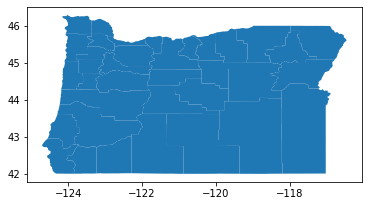

In [22]:
# county map of Oregon
ax = gdf[gdf['STATEFP']=='41'].plot()

From the [Introduction to GeoPandas tutorial](https://geopandas.org/getting_started/introduction.html):
> ...your `GeoDataFrame` is a combination of `Series` with your data (numerical, boolean, text etc.) and `GeoSeries` with geometries (points, polygons etc.).
![image.png](geopandas_dataframe.png)

In [23]:
# grab the latest data for vaccination
data = data[data['Date'] == data['Date'][0]]
data

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct
0,2021-06-20,04003,25,Cochise County,AZ,39.4,49665,49664,45.9,48447,49.0,19266,66.2,97.4
1,2021-06-20,08105,25,Rio Grande County,CO,33.4,3764,3757,38.9,3619,41.4,1178,50.1,74.9
2,2021-06-20,48391,25,Refugio County,TX,0.0,0,0,0.0,0,0.0,0,0.0,0.0
3,2021-06-20,41033,25,Josephine County,OR,36.2,31643,31618,41.4,30765,43.7,15149,65.7,97.7
4,2021-06-20,53015,25,Cowlitz County,WA,43.6,48164,48164,51.2,46739,54.7,17614,82.4,96.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,2021-06-20,20189,25,Stevens County,KS,21.0,1153,1153,25.6,1150,29.2,446,48.7,93.2
3278,2021-06-20,36059,25,Nassau County,NY,56.8,770492,770465,65.9,737994,69.2,206820,83.8,97.4
3279,2021-06-20,08043,25,Fremont County,CO,23.3,11161,11157,26.0,10982,27.3,3953,37.3,74.9
3280,2021-06-20,13257,25,Stephens County,GA,4.8,1234,1234,5.6,1204,6.0,324,6.3,51.9


![image.png](merge-02.png)

In [24]:
# merge geodata and vaccination data
data = data.loc[:,["FIPS", "Series_Complete_Pop_Pct", "Recip_State"]]
gdata = gdf.merge(data, left_on="GEOID", right_on="FIPS")
gdata.head(1)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,Series_Complete_Pop_Pct,Recip_State
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31039,38.1,NE


In [25]:
# extract Oregon data
or_gdata = gdata[gdata["Recip_State"]=='OR']
gdata.shape, or_gdata.shape

((3222, 21), (36, 21))

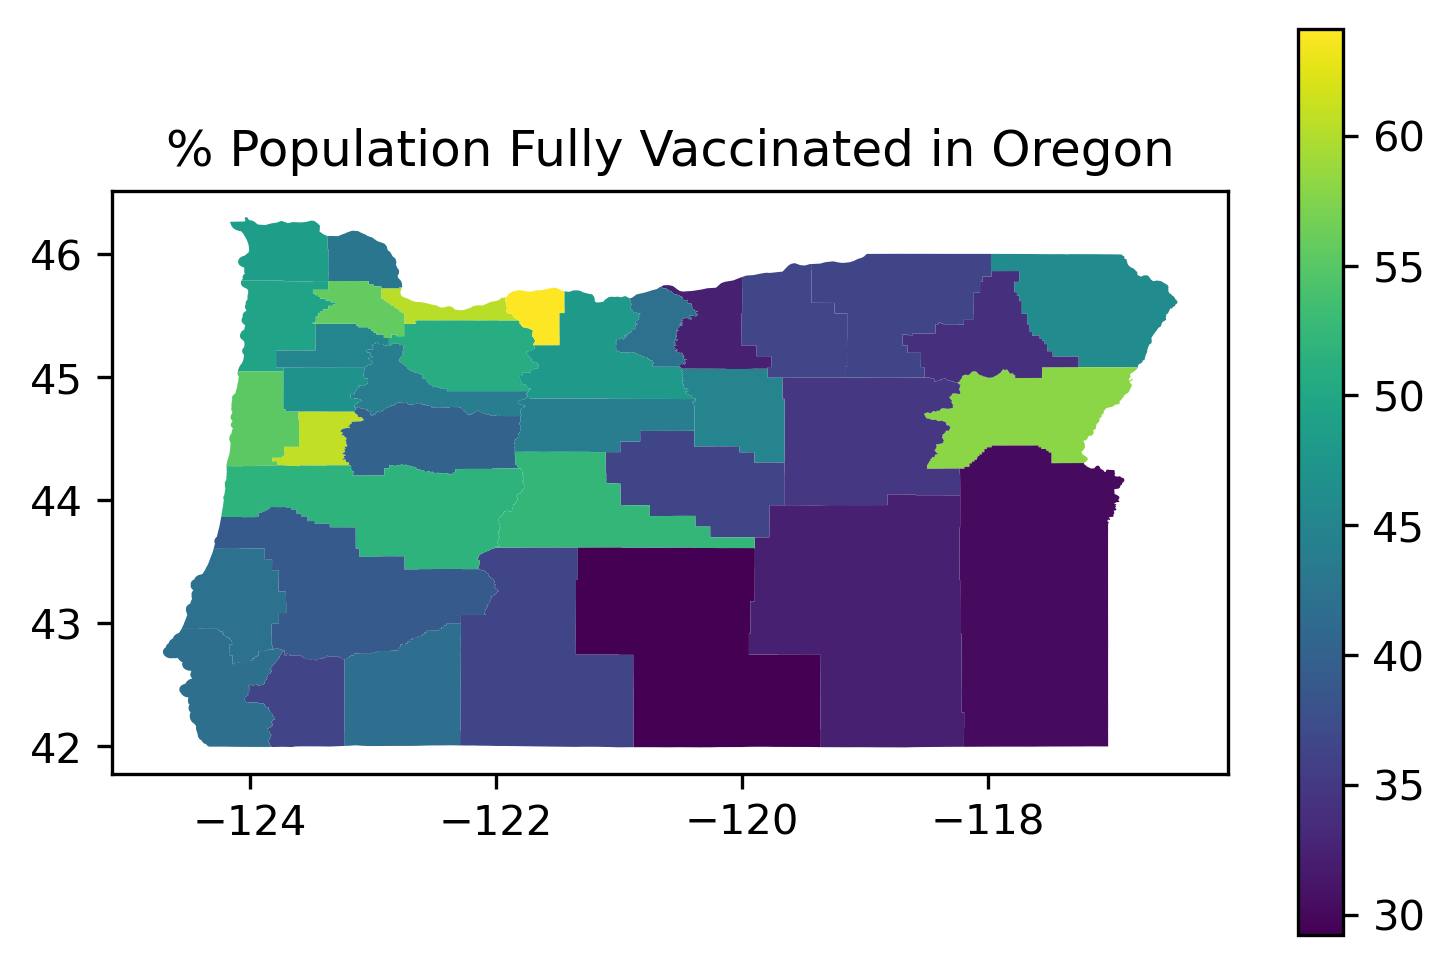

In [26]:
fig, ax = plt.subplots()
fig.set_dpi(300)
ax.set_title('% Population Fully Vaccinated in Oregon')
_ = or_gdata.plot(
    column="Series_Complete_Pop_Pct", 
    ax=ax, 
    legend=True
)

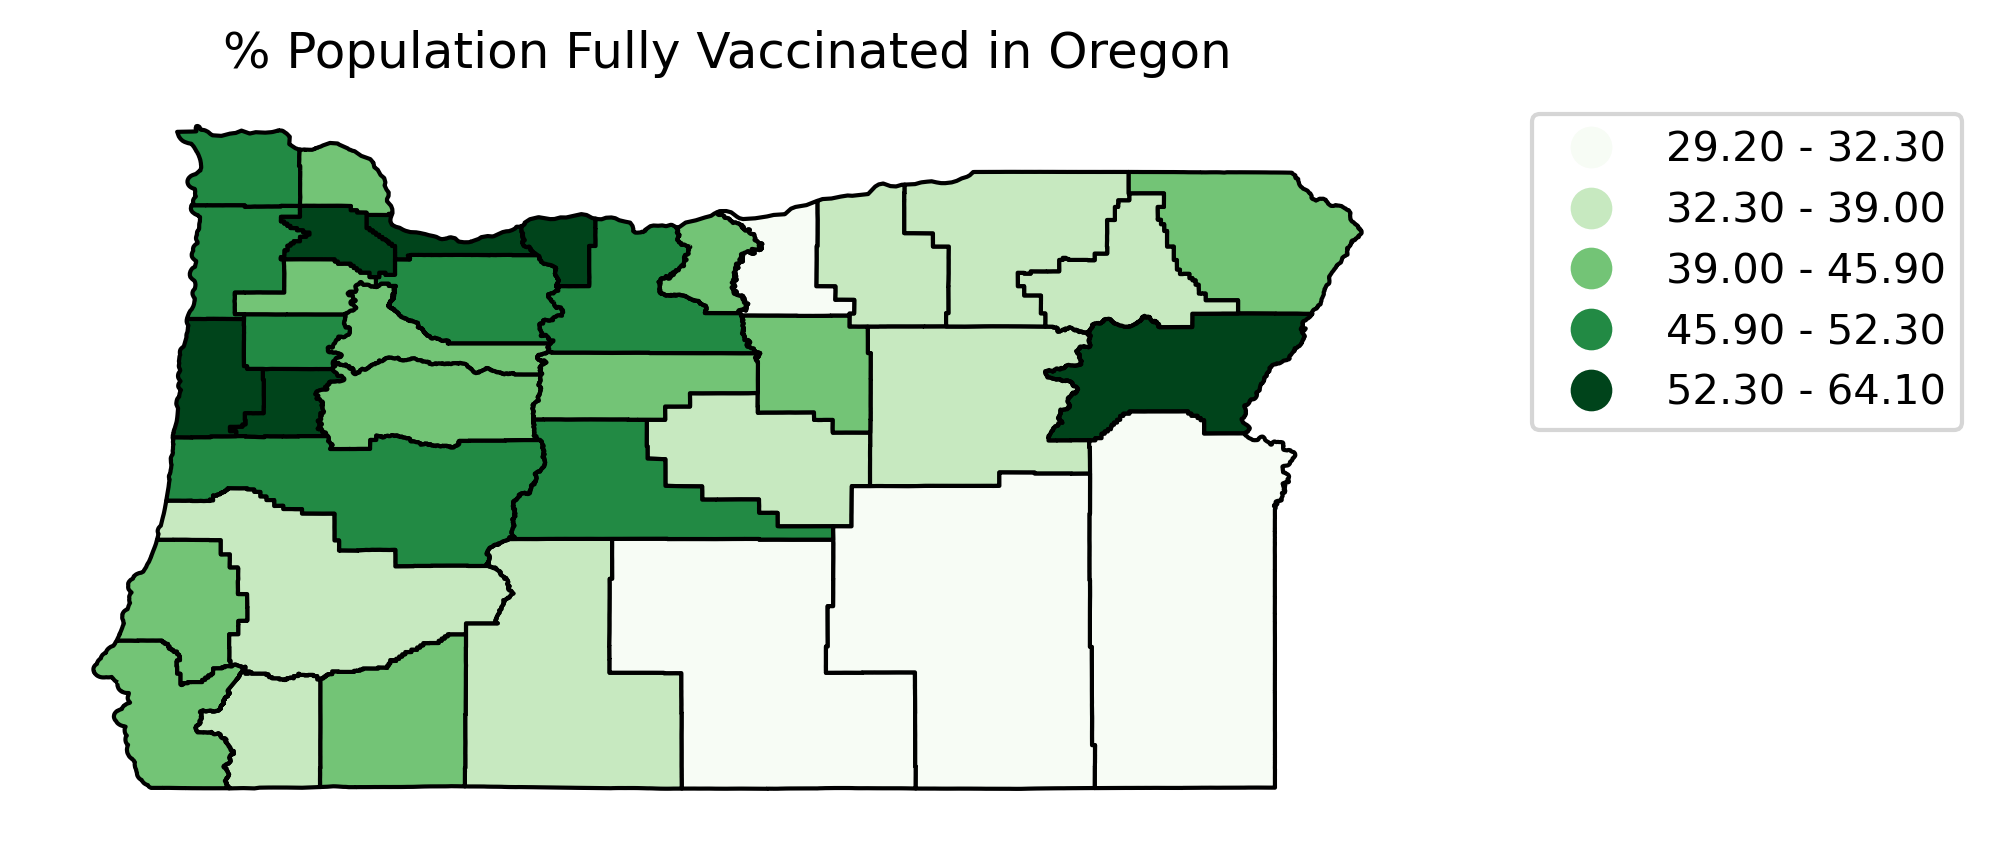

In [27]:
fig, ax = plt.subplots()
fig.set_dpi(300)
ax.set_title('% Population Fully Vaccinated in Oregon')

new_ax = or_gdata.plot(
    column="Series_Complete_Pop_Pct", 
    ax=ax, 
    cmap='Greens',
    scheme='FisherJenks',
    edgecolor='black',
    legend=True, 
    legend_kwds={'bbox_to_anchor':(1.4, 1.0)})


x_axis = new_ax.axes.get_xaxis()
y_axis = new_ax.axes.get_yaxis()
x_axis.set_visible(False)
y_axis.set_visible(False)

r_spine = ax.spines["right"]
l_spine = ax.spines["left"]
t_spine = ax.spines["top"]
b_spine = ax.spines["bottom"]
r_spine.set_visible(False)
l_spine.set_visible(False)
t_spine.set_visible(False)
b_spine.set_visible(False)

/home/jonathan/anaconda3/envs/datascience/lib/python3.8/site-packages/geopandas/plotting.py:615: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches, categories, **legend_kwds)


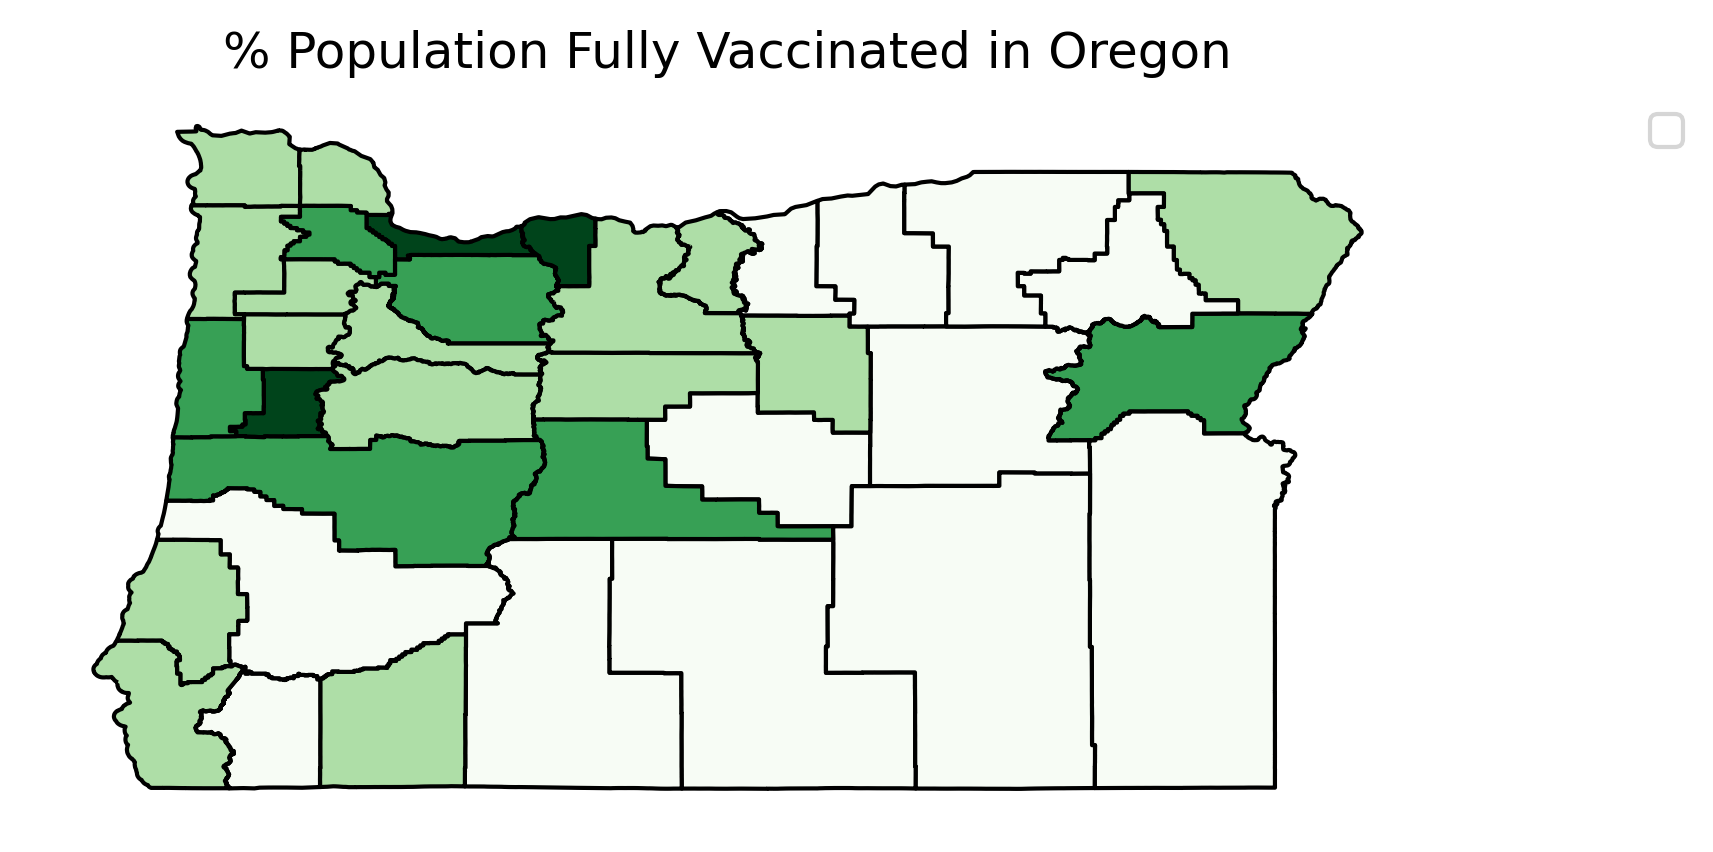

In [28]:
fig, ax = plt.subplots()
fig.set_dpi(300)
ax.set_title('% Population Fully Vaccinated in Oregon')

new_ax = or_gdata.plot(
    column="Series_Complete_Pop_Pct", 
    ax=ax, 
    cmap='Greens',
    scheme='User_Defined',
    classification_kwds=dict(bins=[40,50,60,70]),
    edgecolor='black',
    legend=True,
    legend_kwds={
        'labels': ['< 40%', '40 - 50%', '50 - 60%', '60 - 70%'],
        'bbox_to_anchor':(1.2, 1.0)})

x_axis = new_ax.axes.get_xaxis()
y_axis = new_ax.axes.get_yaxis()
x_axis.set_visible(False)
y_axis.set_visible(False)

r_spine = ax.spines["right"]
l_spine = ax.spines["left"]
t_spine = ax.spines["top"]
b_spine = ax.spines["bottom"]
r_spine.set_visible(False)
l_spine.set_visible(False)
t_spine.set_visible(False)
b_spine.set_visible(False)

fig.savefig("Figure 2 - % Population Fully Vaccinated in Oregon.jpg")

## Visualizing Statistical Data

From _[Visualization Analysis & Design by Tamara Munzner](https://www.amazon.com/Visualization-Analysis-Design-AK-Peters/dp/1466508914)_:

![image.png](histogram_boxplot-03.png)

In [29]:
import seaborn as sns

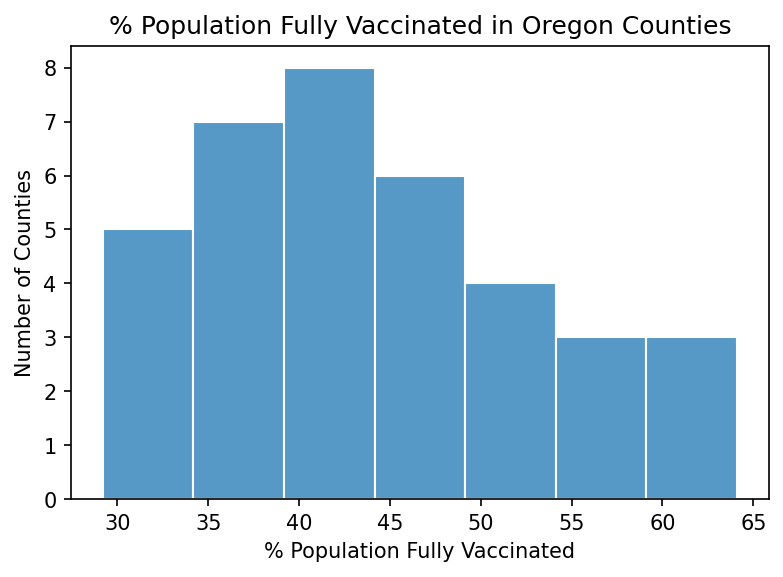

In [30]:
fig, ax = plt.subplots()
fig.set_dpi(150)

ax.set_xlabel("% Population Fully Vaccinated")
ax.set_ylabel("Number of Counties")
ax.set_title("% Population Fully Vaccinated in Oregon Counties")
_ = sns.histplot(or_gdata["Series_Complete_Pop_Pct"], ax=ax, ec='white')

In [31]:
# extract washington state data
wa_gdata = gdata[gdata["Recip_State"]=='WA']

# concatenate with oregon data
or_wa_gdata = pd.concat([or_gdata, wa_gdata])

In [32]:
or_wa_gdata.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,Series_Complete_Pop_Pct,Recip_State
18,41,063,01155135,41063,Wallowa,Wallowa County,06,H1,G4020,None,...,None,A,8147835333,14191752,+45.5937530,-117.1855796,"POLYGON ((-117.74746 45.83324, -117.74745 45.8...",41063,45.9,OR
87,41,013,01155128,41013,Crook,Crook County,06,H1,G4020,140,...,None,A,7715390857,21004473,+44.1630537,-120.3715849,"POLYGON ((-121.01452 44.39032, -121.01311 44.3...",41013,36.3,OR
124,41,005,01155127,41005,Clackamas,Clackamas County,06,H1,G4020,440,...,None,A,4845019827,31883427,+45.1604934,-122.1951274,"POLYGON ((-122.74374 45.33207, -122.74376 45.3...",41005,50.9,OR
172,41,007,01135846,41007,Clatsop,Clatsop County,06,H1,G4020,None,...,None,A,2144846710,661654767,+46.0245094,-123.7050366,"POLYGON ((-124.00807 46.01053, -124.00791 46.0...",41007,48.5,OR
203,41,035,01155134,41035,Klamath,Klamath County,06,H1,G4020,None,...,None,A,15410368803,484957652,+42.6837613,-121.6461682,"POLYGON ((-121.31649 41.99706, -121.31761 41.9...",41035,36.3,OR


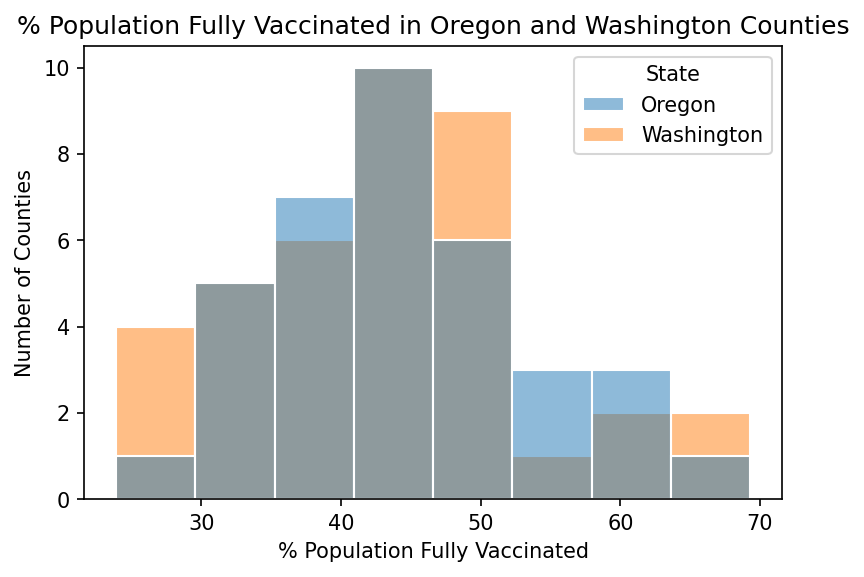

In [33]:
fig, ax = plt.subplots()
fig.set_dpi(150)

# Set labels
ax.set_xlabel("% Population Fully Vaccinated")
ax.set_ylabel("Number of Counties")
ax.set_title("% Population Fully Vaccinated in Oregon and Washington Counties")

# Plot the histogram
ax = sns.histplot(data=or_wa_gdata, x="Series_Complete_Pop_Pct", hue="Recip_State", ax=ax, edgecolor='white')

# Update title to the legend
old_legend = ax.legend_
handles = old_legend.legendHandles
_ = ax.legend(handles, ["Oregon", "Washington"], title="State")

From the `seaborn.histplot` [documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html):

>The choice of bins for computing and plotting a histogram can exert substantial influence on the insights that one is able to draw from the visualization. If the bins are too large, they may erase important features. On the other hand, bins that are too small may be dominated by random variability, obscuring the shape of the true underlying distribution. The default bin size is determined using a reference rule that depends on the sample size and variance. This works well in many cases, (i.e., with “well-behaved” data) but it fails in others. It is always a good to try different bin sizes to be sure that you are not missing something important. This function allows you to specify bins in several different ways, such as by setting the total number of bins to use, the width of each bin, or the specific locations where the bins should break.

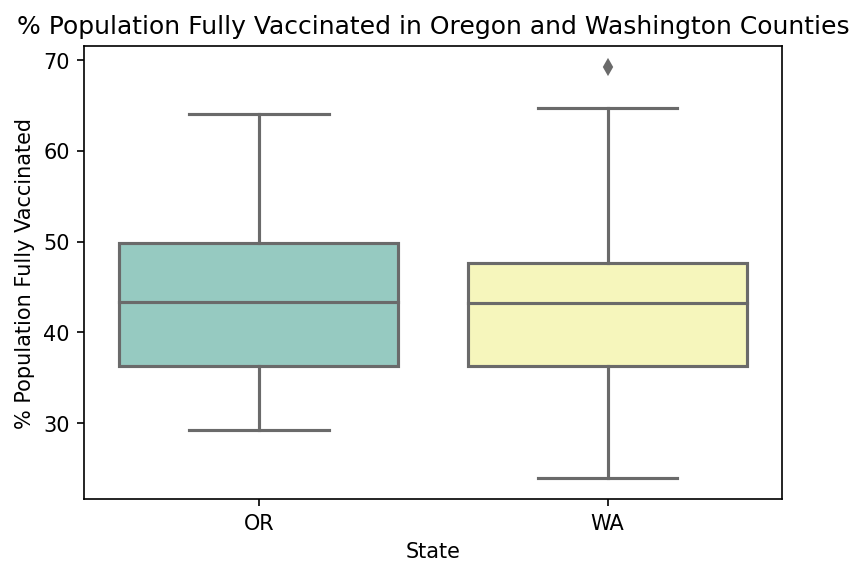

In [34]:
fig, ax = plt.subplots()
fig.set_dpi(150)

# plot the data
ax = sns.boxplot(data=or_wa_gdata, x='Recip_State', y='Series_Complete_Pop_Pct', palette='Set3', ax=ax)

# Set labels
_ = ax.set_title("% Population Fully Vaccinated in Oregon and Washington Counties")
_ = ax.set_xlabel("State")
_ = ax.set_ylabel("% Population Fully Vaccinated")
fig.savefig("Figure 3 - % Population Fully Vaccinated in Oregon and Washington Counties.jpg")

---
#### The anatomy of a boxplot

![image.png](boxplot_anatomy-05.png)

### Visualizing Categorical Data

Question:
- How do Western contiguous states' latest vaccination rates compare?

Western States: 
- ~Alaska~
- Arizona
- California
- ~Hawaii~
- Idaho
- Montana
- Nevada
- New Mexico
- Oregon
- Utah
- Washington
- Wyoming



In [35]:
western_contiguous_states = ['AZ', 'CA', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
grouped.unstack().loc['2021-06-20', western_contiguous_states]

Recip_State
AZ    39.118750
CA    36.406780
ID    30.484444
MT    33.631579
NV    30.505556
NM    35.776471
OR    42.972973
UT    29.593333
WA    42.015000
WY    29.279167
Name: 2021-06-20 00:00:00, dtype: float64

#### COVID-19 Vaccination Rates for Western Contiguous States as of June 6th, 2021
|State|Vaccination Rate|
|:-:|:-:|
|OR|43%|
|WA|42%|
|AZ|39.1%|
|CA|36.4%|
|NM|35.8%|
|MT|33.6%|
|ID|30.5%|
|NV|30.5%|
|UT|29.6%|
|WY|29.3%|

From _[Visualization Analysis & Design by Tamara Munzner](https://www.amazon.com/Visualization-Analysis-Design-AK-Peters/dp/1466508914)_:

![image.png](bar_chart-06.png)

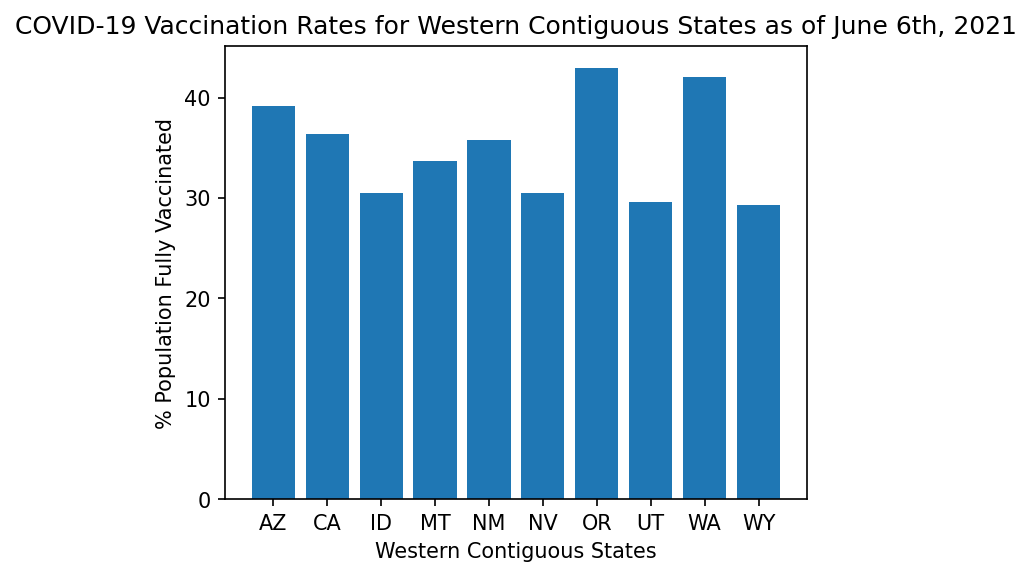

In [36]:
# compare latest vaccination %-age for Western contiguous states
fig, ax = plt.subplots()
fig.set_dpi(150)
fig.set_size_inches(5,4)

ax.set_title('COVID-19 Vaccination Rates for Western Contiguous States as of June 6th, 2021')
ax.set_xlabel('Western Contiguous States')
ax.set_ylabel('% Population Fully Vaccinated')
western_contiguous_rates = grouped.unstack().loc['2021-06-20',western_contiguous_states]
_ = ax.bar(x=western_contiguous_rates.sort_index().index, height=western_contiguous_rates.sort_index())
# compare net revenue for different conferences

In [37]:
western_contiguous_rates.sort_values(ascending=False)

Recip_State
OR    42.972973
WA    42.015000
AZ    39.118750
CA    36.406780
NM    35.776471
MT    33.631579
NV    30.505556
ID    30.484444
UT    29.593333
WY    29.279167
Name: 2021-06-20 00:00:00, dtype: float64

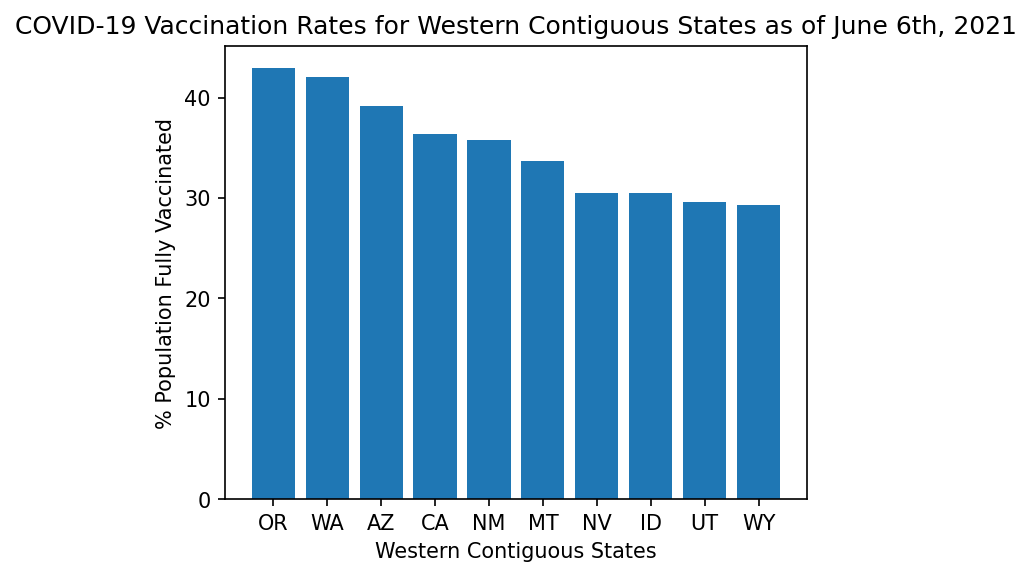

In [38]:
# compare latest vaccination %-age for Western contiguous states
fig, ax = plt.subplots()
fig.set_dpi(150)
fig.set_size_inches(5,4)

ax.set_title('COVID-19 Vaccination Rates for Western Contiguous States as of June 6th, 2021')
ax.set_xlabel('Western Contiguous States')
ax.set_ylabel('% Population Fully Vaccinated')
western_contiguous_rates = grouped.unstack().loc['2021-06-20',western_contiguous_states]
_ = ax.bar(
    x=western_contiguous_rates.sort_values(ascending=False).index, 
    height=western_contiguous_rates.sort_values(ascending=False))
# compare net revenue for different conferences

### Visualizing Continuous Data

In [39]:
# merge population and vaccine rate data
pop_vax_data = data.merge(county_pop, left_on='FIPS', right_on='FIPS')
pop_vax_data

,FIPS,Series_Complete_Pop_Pct,Recip_State,POPESTIMATE2019
0,04003,39.4,AZ,125922
1,08105,33.4,CO,11267
2,48391,0.0,TX,6948
3,41033,36.2,OR,87487
4,53015,43.6,WA,110593
...,...,...,...,...
3136,20189,21.0,KS,5485
3137,36059,56.8,NY,1356924
3138,08043,23.3,CO,47839
3139,13257,4.8,GA,25925


In [40]:
pop_vax_data.sort_values(by='POPESTIMATE2019', ascending=False)

,FIPS,Series_Complete_Pop_Pct,Recip_State,POPESTIMATE2019
2048,06037,48.6,CA,10039107
2097,17031,46.0,IL,5150233
3074,48201,0.0,TX,4713325
2073,04013,36.0,AZ,4485414
3007,06073,39.2,CA,3338330
...,...,...,...,...
24,31005,12.3,NE,463
2080,48261,0.0,TX,404
2731,48269,0.0,TX,272
1002,48301,0.0,TX,169


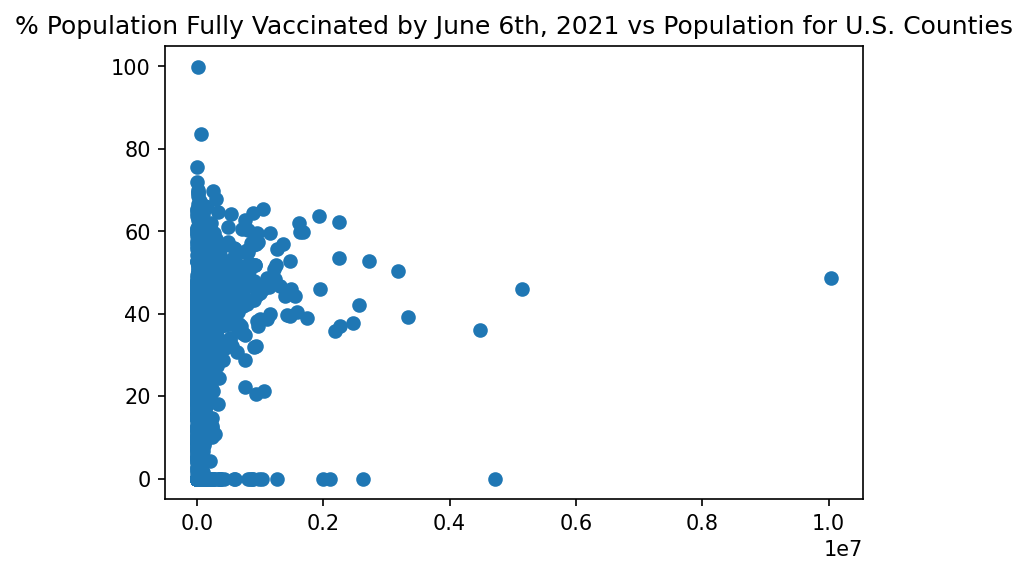

In [41]:
fig, ax = plt.subplots()
fig.set_dpi(150)

ax.set_title('% Population Fully Vaccinated by June 6th, 2021 vs Population for U.S. Counties')
ax.set_xlabel('')
_ = ax.scatter(pop_vax_data['POPESTIMATE2019'], pop_vax_data['Series_Complete_Pop_Pct'])

In [42]:
state_data = data.groupby('Recip_State').mean()
state_data.head()

,Series_Complete_Pop_Pct
Recip_State,
AK,46.526667
AL,26.439706
AR,27.111842
AS,0.000000
AZ,39.118750


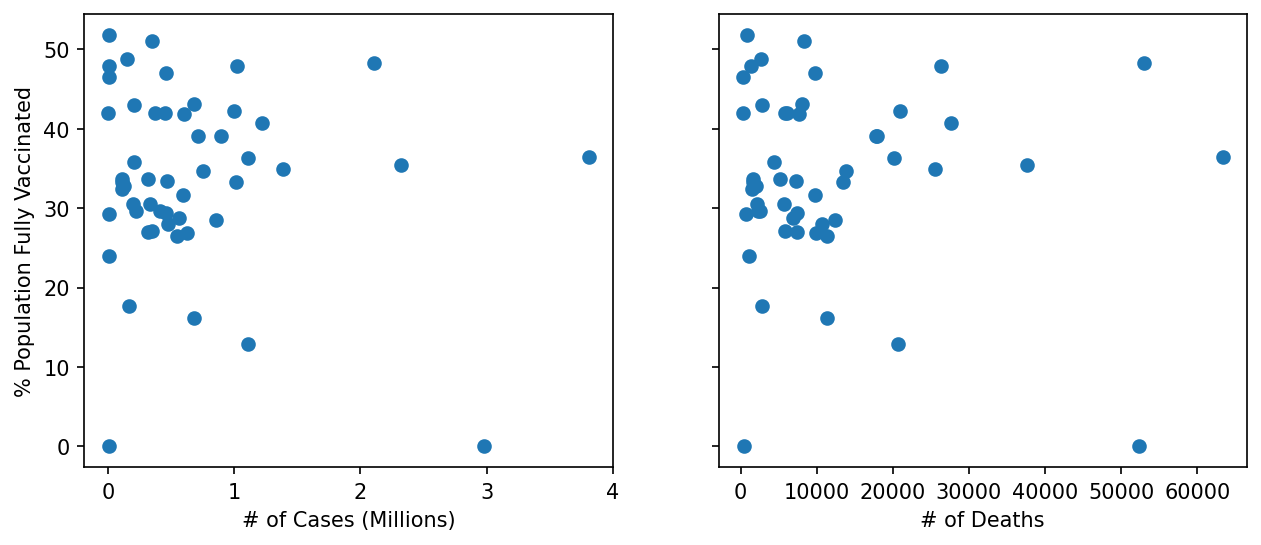

In [43]:
cases_deaths_rates_data = state_data.merge(cases_deaths_data, 
                                           left_on='Recip_State', 
                                           right_on='abbrev')
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_dpi(150)
fig.set_size_inches(10, 4)

axs[0].set_xlabel('# of Cases (Millions)')
axs[1].set_xlabel('# of Deaths')
axs[0].set_ylabel('% Population Fully Vaccinated')

_ = axs[0].scatter(cases_deaths_rates_data['cases'], 
                   cases_deaths_rates_data['Series_Complete_Pop_Pct'])
_ = axs[1].scatter(cases_deaths_rates_data['deaths'], 
                   cases_deaths_rates_data['Series_Complete_Pop_Pct'])